<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*

## Notebook 11: Regression analysis II

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In this Notebook, we learn how to estimate the confidence intervals of estimated parameters, we learn how to fit a straight line through a set of data with outliers, and we learn how to apply the `lmfit` package.

### How accurate are our parameter estimates?

In the first Notebook on regression analysis, we fitted a number of models to several different data sets. The models were fitted by searching for the parameters that gave the best fit, where the best fit was defined as the smallest possible value of the sum of the squares of the errors (the residuals). The optimal parameters are estimates of the true underlying parameters. Since the optimal parameters are estimates, not only their optimal values should be reported but also their (estimated) confidence intervals. 

The confidence intervals of the parameters of a model can be estimated if we can estimate the standard deviation of the estimates of the parameters and if a few other statistical conditions are met, especially that the errors are normally distributed and independent (the error at one point does not depend on the error at another point), and that 
the number of observations $N$ is sufficiently large. A common value for large is 40 or more. 

### Confidence intervals of parameters of a straight line
The standard deviations of the parameters of a straight line can be computed as follows. Consider a data set with $N$ values $x_i$ and corresponding values of $y_i$. A straight line is fit through the data with slope $a$ and intercept $b$. 

$$y = ax + b$$

Estimates of the standard deviations of the parameters may be computed as follows:

$$s_a = \sqrt{\frac{\sum(y_i-\hat{y}_i)^2}{N-2}} \left/ \sqrt{\sum{(x_i-\bar{x})^2}} \right.$$

$$s_b = s_a \sqrt{\frac{1}{N}\sum{x_i^2}}$$

where $\hat{y}_i$ are the fitted values. The 95% confidence interval may now be estimated as plus or minus twice the estimated standard deviation. 

### Exercise 1. Confidence intervals of the parameters of a straight line using estimated standard deviations
Load the $x,y$ values of 20 data points from the file `xydatafit.dat`. Fit a straight line through the data by minimizing the sum of squared errors (using the `linregress` function of `scipy.stats`). Estimate the 95% confidence intervals of the slope and intercept of the straight line using the estimates of the standard deviations of the parameters as given above. 

The standard deviation for the slope is: 0.641829720884 and for the intercept: 7.50809393285
The the 95% confidence interval for the slope is: 4.79378425854 and 7.36110314208
The the 95% confidence interval for the intercept is: 27.5662694931 and 57.5986452245


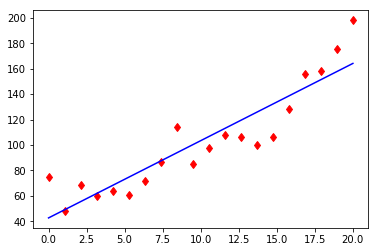

In [2]:
from scipy.stats import linregress
x, y = np.genfromtxt('xydatafit.dat', delimiter=' ' )
z = linregress(x,y)
Lx = np.linspace(0,20,100)
Ly = z.slope * Lx + z.intercept

k1b = 0
k2b = 0
k3b = 0
N = 0
k = 0
q = 0

for i in range(len(x)):
    N += 1
    k += x[i]
    q += y[i]

x_ = k/N
y_ = q/N
    
for i in range(len(x)):
    k1a = (y[i] - (z.slope * x[i] + z.intercept)) ** 2
    k1b += k1a  

    k2a = (x[i] - x_) ** 2
    k2b += k2a  
    
    k3a = x[i] ** 2
    k3b += k3a

sl = np.sqrt((k1b/(N-2))/(k2b))
sl2 = sl * np.sqrt((1/N) * k3b)
plt.plot(x,y,'rd', Lx,Ly,'b')
print('The standard deviation for the slope is:',sl,'and for the intercept:',sl2)
print('The the 95% confidence interval for the slope is:',z.slope -2 * sl, 'and', 2 * sl + z.slope)
print('The the 95% confidence interval for the intercept is:', -2 * sl2 + z.intercept, 'and', 2 * sl2 + z.intercept)

### The bootstrap method

What now if we don't have errors that are normally distributed and independent? Or if we have only a few data points (like above, where we only have 20)? Or if we don't have equations to compute the standard deviations of the parameters, for example when we want to fit something else than a straight line? One option is to use a method called bootstrapping. 

Bootstrapping is a powerful statistical technique to estimate confidence intervals. It is especially useful when the sample size that we are working with is small. Bootstrap techniques work quite well with samples that have less than 40 elements while assuming nothing about the distribution of the data (this information is taken from [here](http://statistics.about.com/od/Applications/a/Example-Of-Bootstrapping.htm)).

A great advantage of bootstrap is its simplicity. It is a straightforward way to derive confidence intervals for estimators of complicated parameters of the distribution. Although for most problems it is impossible to know the true confidence intervals, bootstrap is asymptotically more accurate than the standard intervals obtained using sample variance and assumptions of normality.
Although bootstrapping is (under some conditions) asymptotically consistent, it does not provide general finite-sample guarantees. There are serveral underlying assumptions for bootstrapping to be valid, including that the errors are independent (this information is taken from <a href="https://en.wikipedia.org/wiki/Bootstrapping_(statistics)">here</a>.

There are many different flavors of bootstrapping. In this Notebook, we will make use of *resampling residuals* to estimate the confidence intervals of the estimated parameters. The procedure is as follows.

Consider a data set with $N$ values $x_i$ and corresponding values $y_i$. A model is fitted to the data and the fitted values are called $\hat{y}_i$. The residual $r_i$ can be computed as $r_i=y_i - \hat{y}$. The confidence intervals of the parameters of the model may be obtained with bootstrapping as follows:
1. Compute and store the optimal parameters using the regular approach. 
2. Compute the fitted values $\hat{y}_i$.
3. Compute and store the residuals $r_i$ in an array.
4. For every data point, draw a residual at random (with replacement) from the array of residuals using the `numpy.random.choice` function and add it to the fitted value $\hat{y}_i$. Let's call these values $\tilde{y}_i$.
5. Compute and store the optimal parameters that fit through the $\tilde{y}_i$ values.
6. Repeat steps 4 and 5 $M$ times, for example using $M=1000$. 
7. Compute the approximate $95$% confidence intervals of the parameters using the `np.percentile` function.

### Exercise 2. Confidence intervals of the parameters of a straight line using bootstrapping
Load the $x,y$ values of 20 data points from the file `xydatafit.dat`. Fit a straight line through the data by minimizing the sum of squared errors (using the `linregress` function of `scipy.stats`). Estimate the 95% confidence intervals of the slope and intercept of the straight line using bootstrapping and $M=1000$. Create a histogram of the 1000 estimates of the slope and a separate histogram of the 1000 estimates of the intercept. Report the 95% intervals of both parameters. How do they compare to the estimates in Exercise 1?

Bonus question: On the same histograms, plot the theoretical Normal distributions using your estimates of the slope, intercept, and their standard deviations from Exercise 1. Spoiler: they should match pretty well.

The the 95% confidence interval for the slope is: 4.91513208338 and 7.25983712879
The the 95% confidence interval for the intercept is: 29.467264321 and 56.4310694964

The 95% confidence intervals are smaller


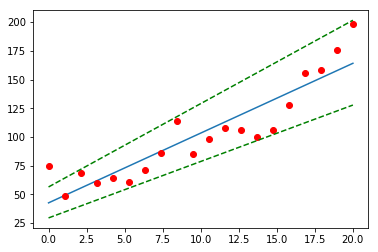

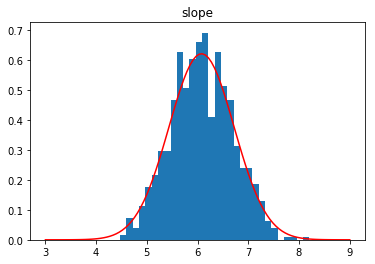

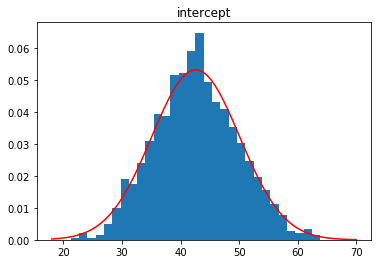

In [3]:
from scipy.stats import linregress
from scipy.stats import norm
x, y = np.genfromtxt('xydatafit.dat', delimiter=' ' )
z = linregress(x,y)
Lx = np.linspace(0,20,100)
Ly = z.slope * Lx + z.intercept
yl = np.zeros(len(x))
r = np.zeros(len(x))
M = 1000
s = np.zeros(M)
intc = np.zeros(M)

for i in range(len(x)):
    yl[i] = z.slope * x[i] + z.intercept
    r[i] = y[i] - yl[i]

for i in range(M):
    yr = np.random.choice(r, len(x))
    yr2 = yr + yl
    q = linregress(x,yr2)
    s[i] = q.slope
    intc[i] = q.intercept
    
smin = np.percentile(s, 2.5)
smax = np.percentile(s, 97.5)

intcmin = np.percentile(intc, 2.5)
intcmax = np.percentile(intc, 97.5)


xnorm1 = np.linspace(3,9,100)
ynorm1 = norm.pdf(xnorm1, loc = z.slope, scale = sl)

xnorm2 = np.linspace(18,70,100)
ynorm2 = norm.pdf(xnorm2, loc = z.intercept, scale = sl2)

print('The the 95% confidence interval for the slope is:', np.percentile(s, 2.5), 'and',np.percentile(s, 97.5))
print('The the 95% confidence interval for the intercept is:', np.percentile(intc, 2.5), 'and',np.percentile(intc, 97.5))
print()
print('The 95% confidence intervals are smaller')

plt.plot(Lx,Ly, x,y,'ro', x, (smin * x + intcmin), 'g--', x, (smax * x + intcmax), 'g--')

plt.figure()
plt.title('slope')
a = plt.hist(s,bins = 30,normed=True)
b = plt.plot(xnorm1,ynorm1, 'r')

plt.figure()
plt.title('intercept')
a = plt.hist(intc,bins = 30,normed=True)
b = plt.plot(xnorm2,ynorm2, 'r')

### Data with outliers
It is difficult to fit a reasonable straight line to a data set when that dataset contains several significant outliers (values that are obviously in error and fall way outside the general trend of the data). For example, consider the 20 data points in the file `xydatafit_outliers.dat`. The values at $x=5$ and $x=15$ appear to be outliers and the best fit straight line is above almost all the other data points:

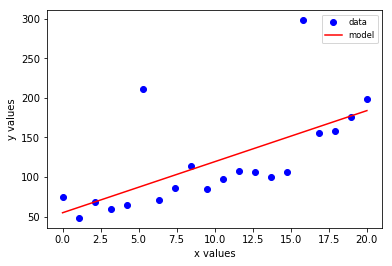

In [4]:
x, y = np.loadtxt('xydatafit_outliers.dat')
slope, intercept, r_value, p_value, sig_a = linregress(x, y)
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'bo', label='data')
plt.plot(x, slope * x + intercept, 'r', label='model')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend(loc='best', fontsize='small');

### Theil-Sen estimator
A robust approach to fit a straight line through a data set that contains outliers it the Theil-Sen method (see the wiki [here](https://en.wikipedia.org/wiki/Theil–Sen_estimator)); it also works well when the data is skewed. The idea behind the Theil-Sen method is very simple: the slope and intercept are computed and stored for every pair of data points. The best estimate of the slope and intercept are the median of the computed slopes and intercepts. 

### Exercise 3. Fit a straight line through a data set with outliers. 
Fit a straight line through the 20 data points contained in the file `xydatafit_outliers.dat` using the Theil-Sen approach. You need a double loop to compute all the slopes and intercepts for all data pairs. Make sure you don't compute the slope and intercept twice for each data pair. Report the slope and intercept you obtain. Make a graph that shows the data, the best fit straight line using regular linear regression, and the Theil-Sen estimate of the best fit line.

The slope with the Theil-Sen approach is: 5.68323324919 The intercept is: 43.738895195


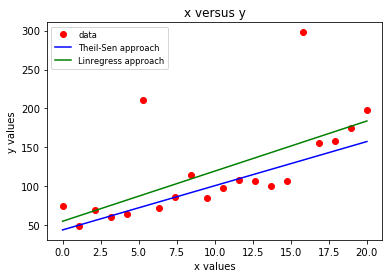

In [5]:
x, y = np.genfromtxt('xydatafit_outliers.dat', delimiter=' ' )
z2 = linregress(x,y)
Lx2 = np.linspace(0,20,100)
Ly2 = z2.slope * Lx + z2.intercept
N = -1
k = 0
q = 0
for i in range(len(x) - 1):
    k += 1
    q += k
s = np.zeros(q)
intc = np.zeros(q)

for i in range(len(x)):
    for j in range(len(x)):
        if x[j] != x[i] :
            N += 1
            slp = (y[i] - y[j])/(x[i]-x[j])
            intcp = y[i] - x[i]*slp
            intc[N] = intcp
            s[N] = slp
        else:
            break

intercept = np.median(intc)
slope = np.median(s)
Lx = np.linspace(0,20,100)
Ly = (slope * Lx + intercept)
plt.plot(x,y,'ro', Lx,Ly,'b', Lx2,Ly2, 'g')
plt.title('x versus y')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend(('data', 'Theil-Sen approach', 'Linregress approach'),loc='best', fontsize='small');

print('The slope with the Theil-Sen approach is:',slope, 'The intercept is:', intercept)

### The `lmfit` package
In the previous Notebook on linear regression, we learned how to use the `curve_fit` method to fit an arbitrary function to a set of data. The `curve_fit` method works well, but it has some limitations. For example, you cannot set boundaries for your parameters, nor can you fix a parameter during optimization. A versatile package for fitting data is the `lmfit` package. The `lmfit` package does not come with the Anaconda Python distribution (yet), so you have to install it yourself. Open the command prompt on Windows (go to start $\to$ run and type `cmd`) or the terminal on a Mac (search for `terminal` in spotlight). Then type
    
    pip install lmfit
    
and `lmfit` will be installed (you need to be on the internet, of course). 

The `lmfit` package has an object oriented structure. Here we will learn the basics.
Full information on `lmfit` can be found [here](http://lmfit.github.io/lmfit-py/). 
We start by importing the `Parameters` class and the `minimize` and `fit_report` functions.

In [6]:
from lmfit import Parameters, minimize, fit_report

Next, we write a Python function to fit through the data. As an example we will fit a straight line. The first argument of the function is a `Parameters` object, which stores the parameter values in a dictionary. Recall what a dictionary is: A dictionary is a data type that links a word in the dictionary to a value and is specified between braces `{}`. The value can be anything. You can then use the word in the dictionary as the index, just like you would look up a word in a paper dictionary. For example:

In [7]:
example_dict = {'goals': 20, 'city': 'Delft'}
print(example_dict['goals'])
print(example_dict['city'])

20
Delft


The function for a straight line contains two keyword arguments: `xdata`, which are the $x$ values of the data, and `ydata`. If `ydata` is supplied, it is subtracted from the fitted values so that the function returns the residuals. If it is not supplied, the function returns the fitted values. The dictionary of parameter values is obtained from a `Parameters` object with the `valuesdict` function.

In [8]:
def straightline(p, xdata=0, ydata=None):
    vals = p.valuesdict()  # store dictionary in variable vals
    slope =  vals['slope']
    intercept =  vals['intercept']
    yfit = slope * xdata + intercept
    if ydata is None:
        return yfit
    else:
        return yfit - ydata

Now we create a `Parameters` object, add the parameters, and specify an initial value:

In [9]:
pline = Parameters()
pline.add('slope', value=1.0)
pline.add('intercept', value=1.0)

Finally, we load the data we want to fit, we call the `minimize` function to fit the data, and we print the `fit_report`. The keyword arguments of the function need to be supplied as a dictionary to the keyword argument `kws` of the `minimize` function. 

In [10]:
x, y = np.loadtxt('xydatafit.dat')
line_result = minimize(straightline, pline, kws={'xdata':x, 'ydata':y})
print(fit_report(line_result))

[[Fit Statistics]]
    # function evals   = 8
    # data points      = 20
    # variables        = 2
    chi-square         = 5463.697
    reduced chi-square = 303.539
    Akaike info crit   = 116.203
    Bayesian info crit = 118.194
[[Variables]]
    slope:       6.07744374 +/- 0.641829 (10.56%) (init= 1)
    intercept:   42.5824573 +/- 7.508093 (17.63%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(slope, intercept)          = -0.855 


The `minimize` function returns a `MinimizerResult` object. The `fit_report` function may be used to print the most important information of the `MinimizeResult` to the screen. The `chi-square` value is the sum of squared residuals at the optimum. The `+/-` part of the fitted parameters are `+/-` one standard deviation (which is estimated using a numerical derivative). The `Correlations` are a measure of how correlated the parameters are (they are not to be confused with the correlation coefficient $r$ or $r^2$ of the fit). A value of `+1` means they are perfectly correlated, which means that if you multiply both parameters by 2, you get the same answer. A value of `-1` means they are perfectly negatively correlated, which means that if you multiply one parameter by 2 and divide the other by 2, you again get the same answer. You want the correlation between parameters to be small (near zero), but that is not always possible. 

The `MinimizerResult` object, called `line_result` in the code above, has a number of attributes, including `params`, which is a `Parameters` object with the optimal parameters. The fitted values may be obtained with the `straightline` method defined above, by passing it the optimal parameters and by not supplying it with `ydata`. 

In [11]:
yfit = straightline(line_result.params, xdata=x)
print(yfit)

[  42.5824573    48.9797665    55.37707571   61.77438492   68.17169412
   74.56900333   80.96631253   87.36362174   93.76093095  100.15824015
  106.55554936  112.95285856  119.35016777  125.74747698  132.14478618
  138.54209539  144.93940459  151.3367138   157.734023    164.13133221]


It is a bit more work to get the estimate standard deviations of the parameters out of the `MinimizerResult` object. The `MinimizerResult` object has an attribute called `covar`, which returns the covariance matrix. The diagonal of the covariance matrix containst the estimated variances of the parameters, and the standard deviations are the square root of the varances. Compare them to the values after the `+/-` sign of the `fit_report` (they are the same):

In [12]:
standard_deviations = np.sqrt(np.diag(line_result.covar))
print('standard deviations of parameters:', standard_deviations)

standard deviations of parameters: [ 0.64182972  7.50809394]


### Exercise 4. Check the results of `lmfit`
For the straight line fitted with `lmfit` above, compute the standerd deviations of the slope and intercept using the equations supplied at the beginning of this Notebook and make sure they are the same as the result of `lmfit`. Next, compute the sum of squared errors and make sure it is the same as the value of `chi-square` obtained by the `minimize` function. 

In [13]:
x, y = np.genfromtxt('xydatafit.dat', delimiter=' ' )
z = linregress(x,y)
k1b = 0
k2b = 0
k3b = 0
k4b = 0
N = 0
k = 0
q = 0

for i in range(len(x)):
    N += 1
    k += x[i]
    q += y[i]
x_ = k/N
y_ = q/N
    
for i in range(len(x)):
    k1a = (y[i] - (z.slope * x[i] + z.intercept)) ** 2
    k1b += k1a  
    k2a = (x[i] - x_) ** 2
    k2b += k2a   
    k3a = x[i] ** 2
    k3b += k3a

sl = np.sqrt((k1b/(N-2))/(k2b))
sl2 = sl * np.sqrt((1/N) * k3b)
sl3 = standard_deviations[0]
sl4 = standard_deviations[1]
print('The s.d. according to the formulas for the slope is:',sl,'and for the intercept:',sl2)
print('The s.d. according to lmfit for the slope is:',sl3,'and for the intercept:',sl4)

print('The squared sum of the errors is:',k1b, 'This is the same as in lmfit')

The s.d. according to the formulas for the slope is: 0.641829720884 and for the intercept: 7.50809393285
The s.d. according to lmfit for the slope is: 0.641829722622 and for the intercept: 7.50809394127
The squared sum of the errors is: 5463.69675967 This is the same as in lmfit


### Fixing  parameter
A parameter my be fixed by setting the `vary` attribute to `False`. For example, let's fix the value of `b` to 50. 

In [14]:
pline['intercept'].value = 50
pline['intercept'].vary = False
line_result2 = minimize(straightline, pline, kws={'xdata':x, 'ydata':y})
print(fit_report(line_result2))

[[Fit Statistics]]
    # function evals   = 6
    # data points      = 20
    # variables        = 1
    chi-square         = 5759.958
    reduced chi-square = 303.156
    Akaike info crit   = 115.259
    Bayesian info crit = 116.255
[[Variables]]
    slope:       5.53539250 +/- 0.332818 (6.01%) (init= 1)
    intercept:   50 (fixed)
[[Correlations]] (unreported correlations are <  0.100)


### Exercise 5. Fit an exponential function with `lmfit`
Use the $x,y$ values of 20 data points from the file `xydatafit.dat`. Fit the function $f(x) = A\exp(ax) + b$ through the data using `lmfit`. Print a fitting report of the estimated parameters $A$, $a$, and $b$. Plot the data and the fitted function. 

In [15]:
x, y = np.loadtxt('xydatafit.dat')
def exp(e, xdata=0, ydata=None):
    vals = e.valuesdict()
    A =  vals['A']
    a =  vals['a']
    b =  vals['b']
    yfit = A * np.exp(a * xdata) + b
    if ydata is None:
        return yfit
    else:
        return yfit - ydata

In [16]:
eline = Parameters()
eline.add('A', value=1)
eline.add('a', value=1)
eline.add('b', value=1)

In [17]:
x, y = np.loadtxt('xydatafit.dat')
line_result = minimize(exp, eline, kws={'xdata':x, 'ydata':y})
print(fit_report(line_result))

[[Fit Statistics]]
    # function evals   = 146
    # data points      = 20
    # variables        = 3
    chi-square         = 2381.588
    reduced chi-square = 140.093
    Akaike info crit   = 101.596
    Bayesian info crit = 104.583
[[Variables]]
    A:   9.76933745 +/- 6.165144 (63.11%) (init= 1)
    a:   0.13389950 +/- 0.029816 (22.27%) (init= 1)
    b:   52.5007446 +/- 11.00110 (20.95%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(A, a)                      = -0.994 
    C(A, b)                      = -0.947 
    C(a, b)                      =  0.918 


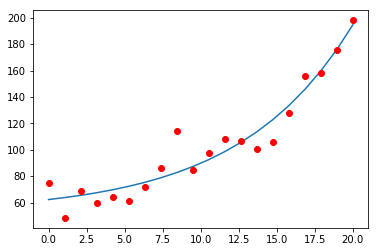

In [18]:
A = line_result.params['A'].value
a = line_result.params['a'].value
b = line_result.params['b'].value

xfit = np.linspace(0,20,20)
yfit = A*np.exp(a*xfit)+b
plt.plot(xfit,yfit, x,y, 'ro');

# Exercise 6. Use bootstrap to find confidence intervals of parameters of exponential function
Apply the bootstrap method with $M=1000$ to estimate the 95% confidence intervals of the parameters $A$, $a$, and $b$ in the exponential function fitted to the data in the previous exercise (hint: this may take a little computation time, so develop your code with $M=100$ and when it works correctly change it to $M=1000$). Draw histograms of all three parameters. Note that they don't all have a bell-shaped curve like a Normal distribution. Report the 95% confidence intervals. 

Bonus question: report the 95% confidence intervals obtained with the estimated standard deviations computed by `lmfit`. Note that the estimates are by far not as good as for the results of exercise 2, because the distribution of the parameters is not very Normal. 

In [19]:
standard_deviations = np.sqrt(np.diag(line_result.covar))
sA = standard_deviations[0]
sa = standard_deviations[1]
sb = standard_deviations[2]

x, y = np.genfromtxt('xydatafit.dat', delimiter=' ' )
A = line_result.params['A'].value
a = line_result.params['a'].value
b = line_result.params['b'].value
M = 1000
Lx = np.linspace(0,20,100)
Ly = A * np.exp(a * Lx) + b
yl = np.zeros(len(x))
r = np.zeros(len(x))
A2 = np.zeros(M)
a2 = np.zeros(M)
b2 = np.zeros(M)
def fexp(x,A,a,b):
    return(A*np.exp(a*x)+b)
print(sA,sa,sb)

6.16514484139 0.0298162588429 11.001106393


In [20]:
for i in range(len(x)):
    yl[i] = A * np.exp(a * x[i]) + b
    r[i] = y[i] - yl[i]
    
for i in range(M):
    yr = np.random.choice(r, len(x))
    yr2 = yr + yl
    line_result = minimize(exp, eline, kws={'xdata':x, 'ydata':yr2})
    A2[i] = line_result.params['A'].value
    a2[i] = line_result.params['a'].value
    b2[i] = line_result.params['b'].value

The 95% interval with the bootstrap method is: 2.84445900488 But smaler than: 29.8152450384
The 95% interval with the standart deviation method is: -2.56095222589 and 22.0996271397

The 95% interval with the bootstrap method is: 0.0853030675839 But smaler than: 0.194913233317
The 95% interval with the standart deviation method is: 0.074266989736 and 0.193532025107

The 95% interval with the bootstrap method is: 25.5660730371 But smaler than: 68.8225857511
The 95% interval with the standart deviation method is: 30.4985318458 and 74.502957418


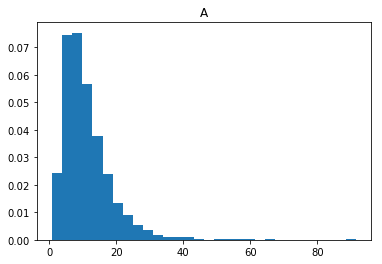

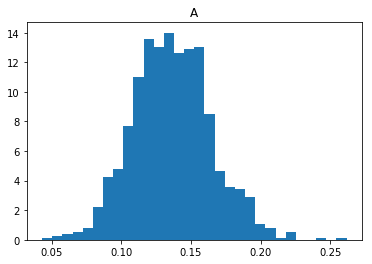

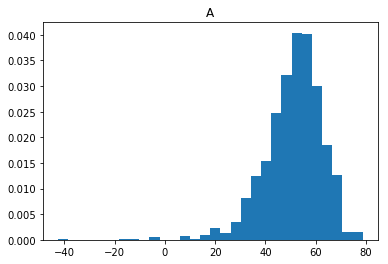

In [21]:

Amin = np.percentile(A2, 2.5)
Amax = np.percentile(A2, 97.5)

amin = np.percentile(a2, 2.5)
amax = np.percentile(a2, 97.5)

bmin = np.percentile(b2, 2.5)
bmax = np.percentile(b2, 97.5)

print('The 95% interval with the bootstrap method is:', Amin, 'But smaler than:',Amax)
print('The 95% interval with the standart deviation method is:',(A-2*sA), 'and', (2*sA+A))
print('')
print('The 95% interval with the bootstrap method is:', amin, 'But smaler than:',amax)
print('The 95% interval with the standart deviation method is:', (a - 2*sa), 'and', (2*sa + a))
print('')
print('The 95% interval with the bootstrap method is:', bmin,'But smaler than:',bmax)
print('The 95% interval with the standart deviation method is:',b - 2*sb, 'and',  2*sb + b)

plt.figure()
plt.title('A')
ab = plt.hist(A2,bins = 30,normed=True)

plt.figure()
plt.title('A')
ab = plt.hist(a2,bins = 30,normed=True)

plt.figure()
plt.title('A')
ab = plt.hist(b2,bins = 30,normed=True)